=== Basic Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtype

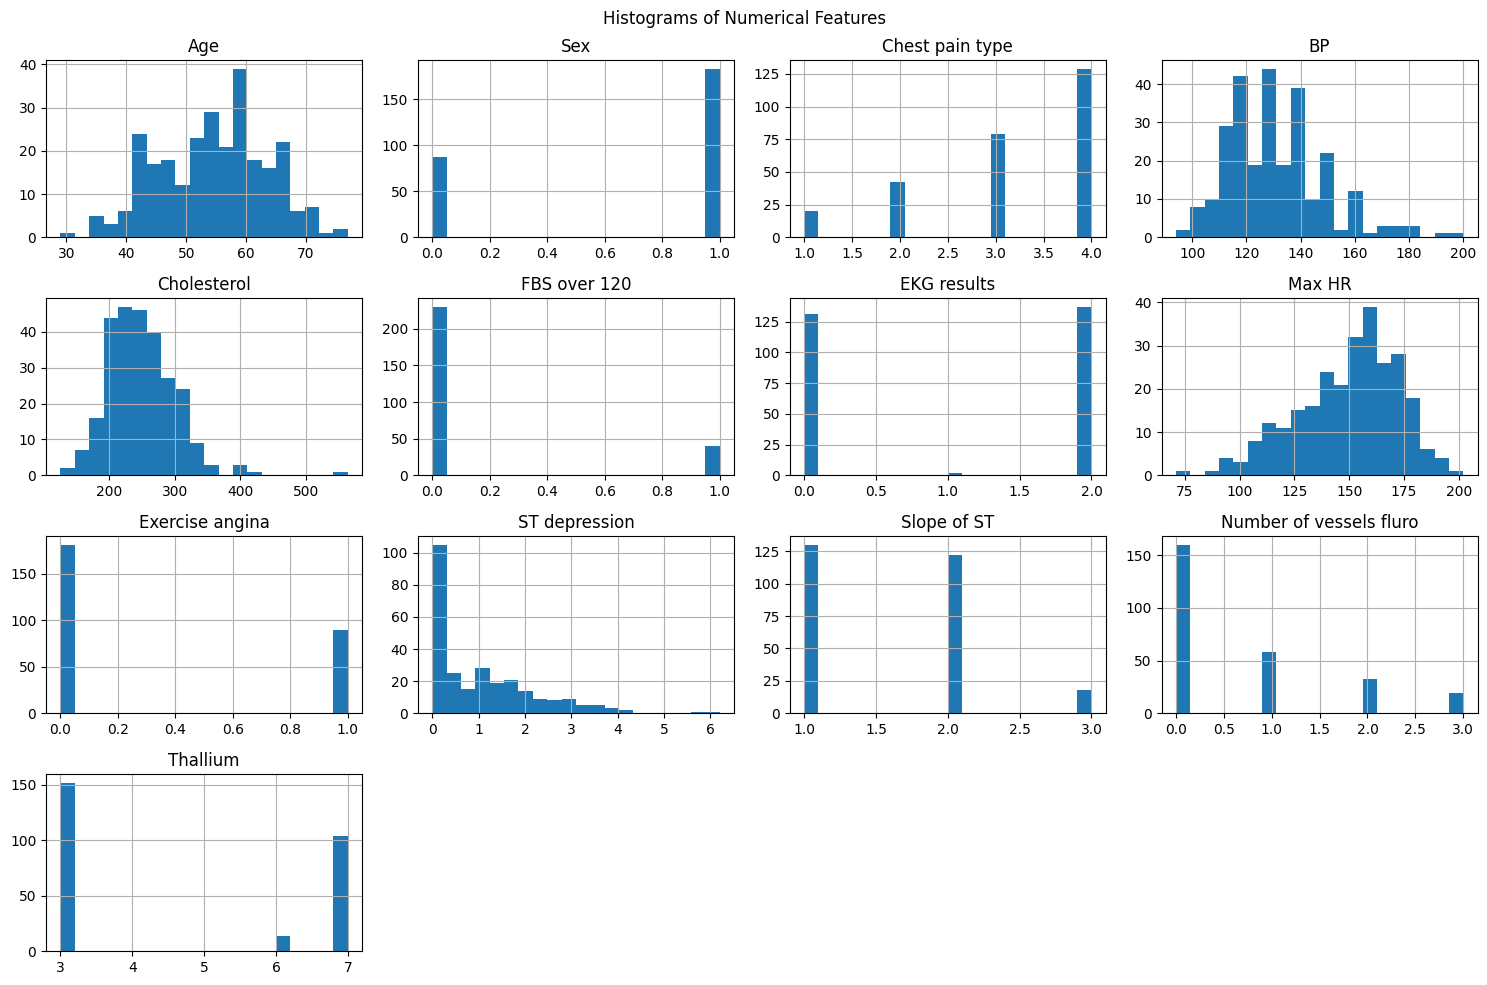

=== Boxplots for Numerical Features ===


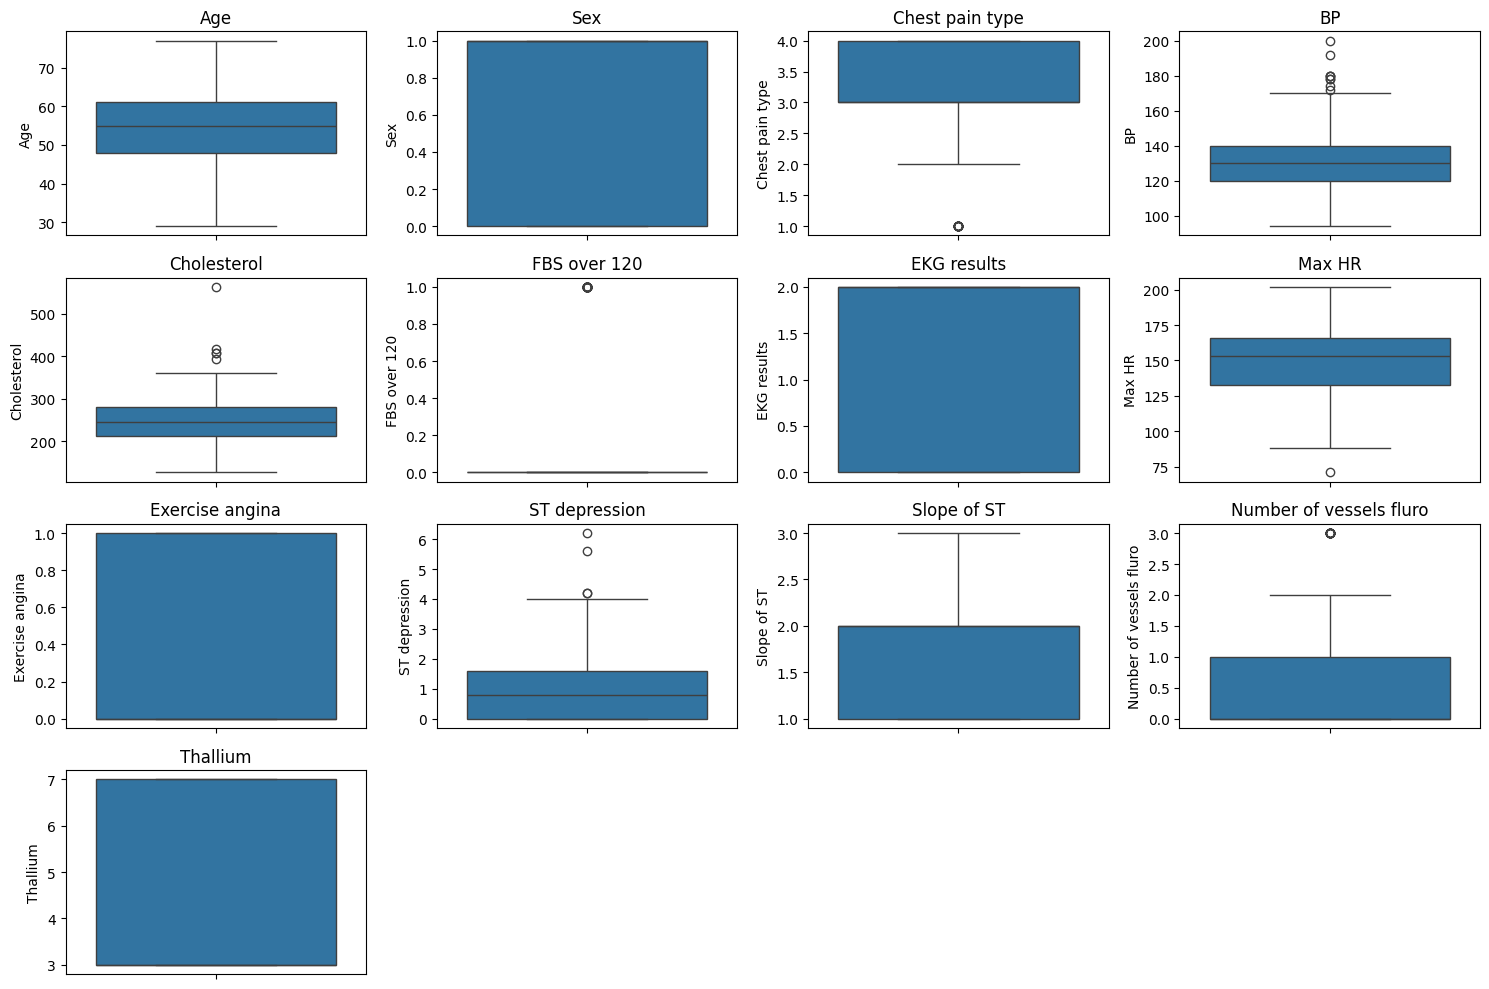

=== Correlation Heatmap ===


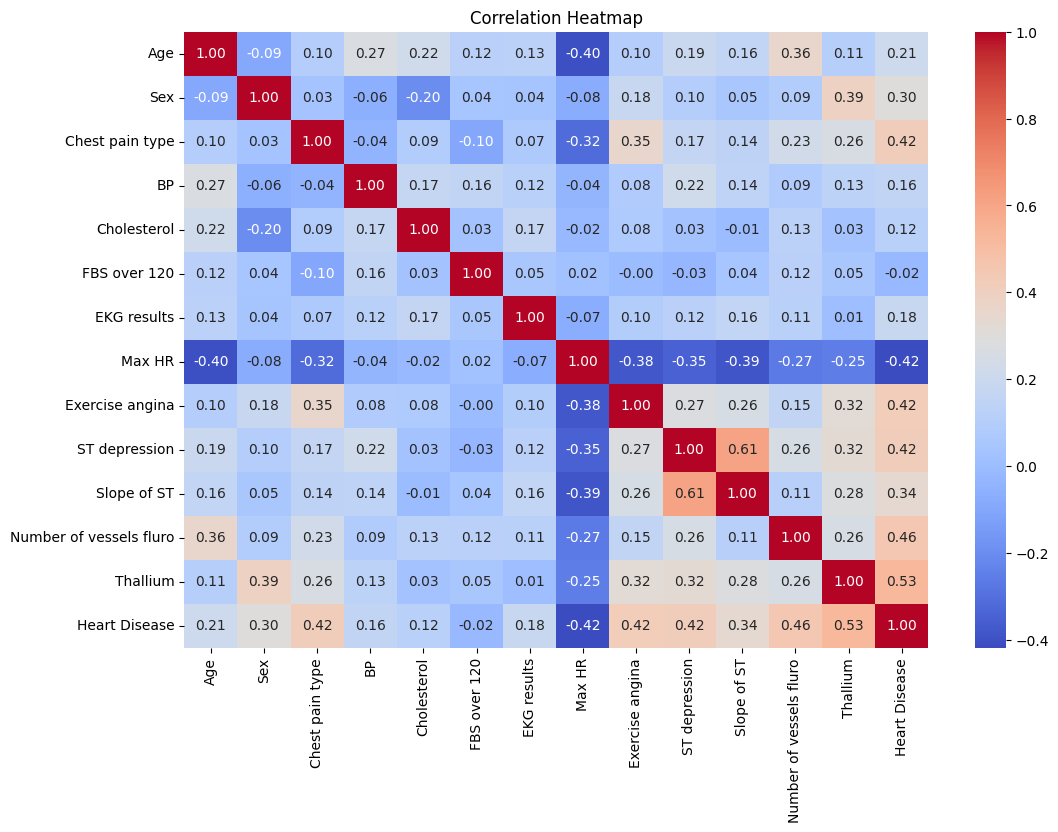

=== Pairplot for Selected Features ===


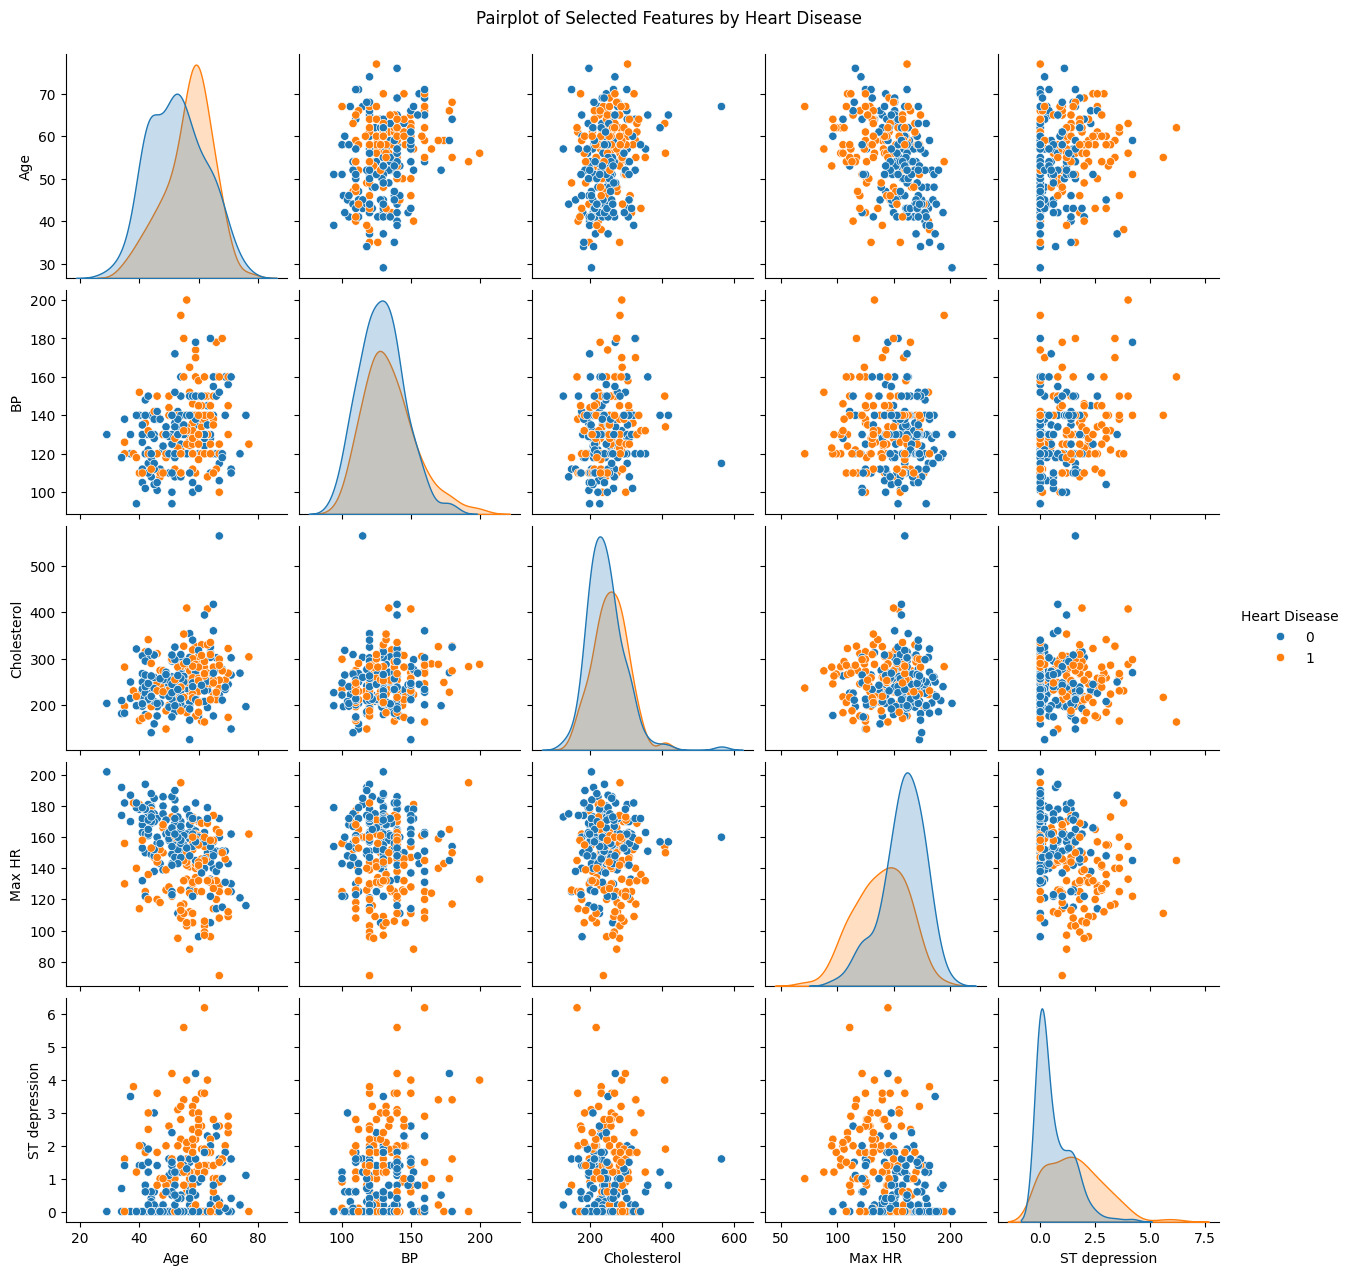

=== Count Plots for Categorical Features ===


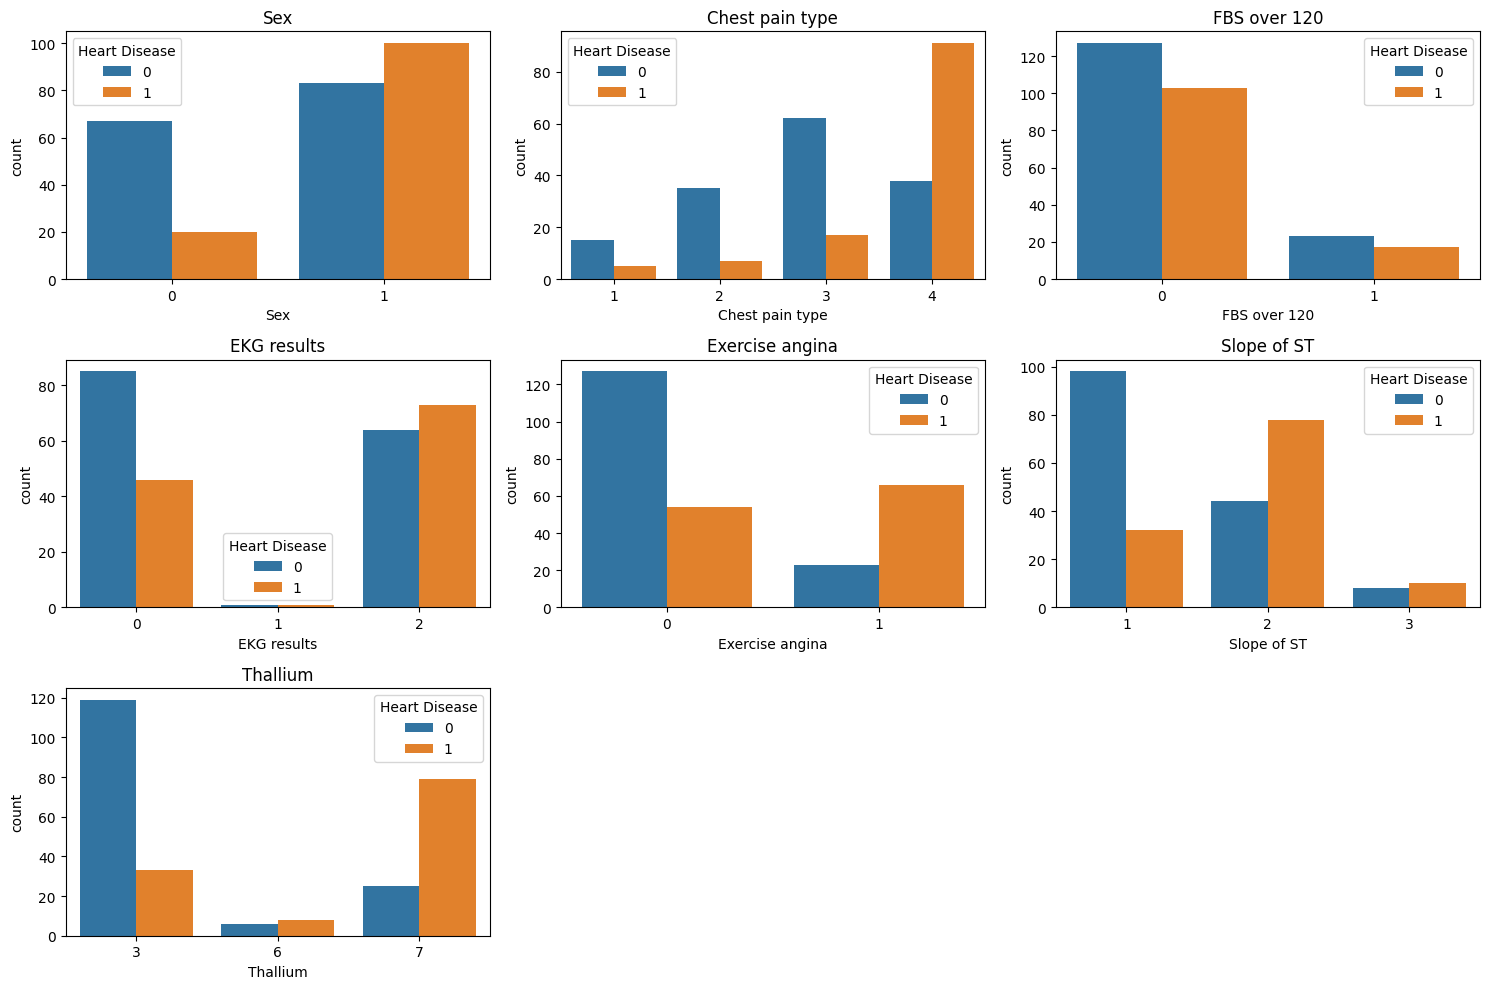

=== Distribution of Target Variable ===


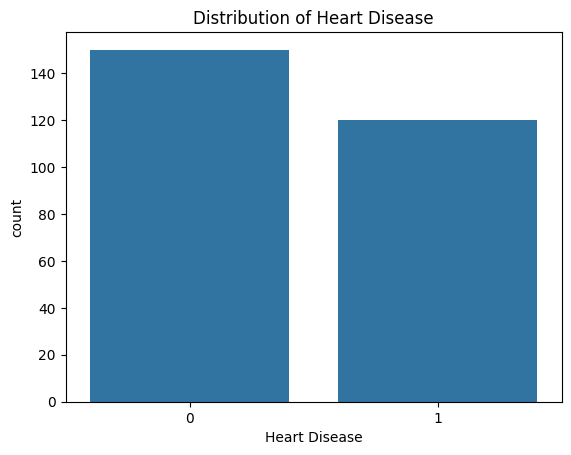

EDA completed and results saved.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Heart_Disease_Prediction.csv')

# Display basic information about the dataset
print("=== Basic Information ===")
print(df.info())
print("\n")

# Display the first few rows of the dataset
print("=== First 5 Rows ===")
print(df.head())
print("\n")

# === Summarize Data Distributions for All Features ===
print("=== Summary Statistics for Numerical Features ===")
print(df.describe())
print("\n")

# Check for missing values
print("=== Missing Values ===")
print(df.isnull().sum())
print("\n")

# Check for duplicates
print("=== Duplicate Rows ===")
print(df.duplicated().sum())
print("\n")

# === Visualize Distributions of Numerical Features ===
# Plot histograms for numerical features
print("=== Histograms of Numerical Features ===")
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

# === Identify Outliers ===
# Plot boxplots for numerical features to detect outliers
print("=== Boxplots for Numerical Features ===")
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# === Visualize Relationships Between Features and Target Variable ===
# Convert target variable to binary for visualization
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Plot correlations between features and target variable
print("=== Correlation Heatmap ===")
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Plot pairplot for selected features and target variable
print("=== Pairplot for Selected Features ===")
sns.pairplot(df, vars=['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression'], hue='Heart Disease', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features by Heart Disease", y=1.02)
plt.show()

# === Analyze Categorical Features ===
# Plot count plots for categorical features
print("=== Count Plots for Categorical Features ===")
categorical_features = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium']
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, hue='Heart Disease', data=df)
    plt.title(column)
plt.tight_layout()
plt.show()

# === Analyze Target Variable ===
# Plot the distribution of the target variable
print("=== Distribution of Target Variable ===")
sns.countplot(x='Heart Disease', data=df)
plt.title("Distribution of Heart Disease")
plt.show()

# === Save the EDA Results ===
# Save the cleaned dataset (if any changes were made)
df.to_csv('Heart_Disease_Prediction_Cleaned.csv', index=False)
print("EDA completed and results saved.")